# Understanding Descriptive Statistics

Import the necessary libraries here:

In [141]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [41]:
# your code here

dice_numbers = ['1','2','3','4', '5','6']
  
numbers = random.choices(dice_numbers,  k = 10)
df = pd.DataFrame(numbers).reset_index()
df.columns=['Roll', 'Number']
df['Number'] = df['Number'].astype(int)
df


,Roll,Number
0,0,2
1,1,5
2,2,5
3,3,1
4,4,3
5,5,5
6,6,1
7,7,4
8,8,3
9,9,3


#### 2.- Plot the results sorted by value.

<AxesSubplot:>

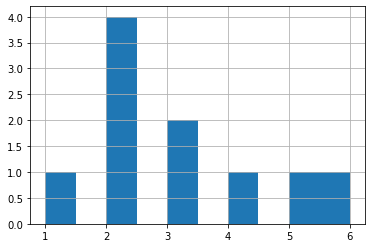

In [3]:
# your code here
df_sorted= df.sort_values(by= 'Number')
df_sorted['Number'].hist()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [17]:
# your code here
df_frequency= df_sorted['Number'].value_counts().reset_index()
df_frequency.columns= ['Number', 'Frequency']
df_frequency.sort_values(by= 'Number')


,Number,Frequency
2,1,1
0,2,4
1,3,2
3,4,1
4,5,1
5,6,1


<AxesSubplot:>

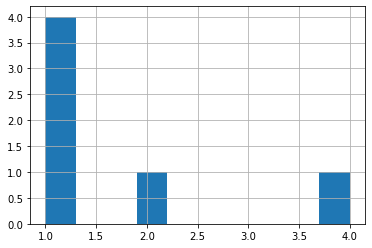

In [20]:
df_frequency['Frequency'].hist()

In [ ]:
"""
your comments here
"""

# Por ser pocos valores, 10, la frequencia no se distribuye de manera equitativa

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [62]:
# your code here

def media (df):
    lista= df.to_list()
    long= len(lista)
    media= 0
    for i in lista:
        media= media+i
    media_final= media/long
    return media_final
    

In [63]:
media(df['Number'])

3.2

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [64]:
# your code here

df_frequency

,Number,Frequency
0,2,4
1,3,2
2,1,1
3,4,1
4,5,1
5,6,1


In [65]:
media(df_frequency['Frequency'])

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [86]:
# your code here

def mediana (df):
    lista= df.sort_values().to_list()
    lon= len(lista)
    lon_mitad= int(lon/2)
    if lon % 2==0:
        suma= lista[lon_mitad-1]+ lista[lon_mitad]
        mediana= suma/2
        return mediana
    else:
        mediana= lista[lon_mitad]
        return mediana
    

In [87]:
mediana (df['Number'])   

3.0

In [84]:
df['Number'].median()

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [248]:
# your code here

# Q1 es el percentil 25, Q2 es el percentil 50 (mediana) y Q3 es el percentil 75

def quartil1 (df):
    lista= df.sort_values().to_list()
    lon= len(lista)
    q1= int((lon+1)/4)
    
    if q1 % 2==0:
        q1_value= lista[q1]
        return q1_value
    else:
        q1_value= (lista[q1-1]+ lista[q1])/2  
        return q1_value

In [92]:
quartil1(df['Number'])


2

In [93]:
def quartil3 (df):
    lista= df.sort_values().to_list()
    lon= len(lista)
    q3= int((lon+1)/4*3)
    
    if q3 % 2==0:
        q3_value= lista[q3]
        return q3_value
    else:
        q3_value= (lista[q3-1]+ lista[q3])/2  
        return q3_value

In [94]:
quartil3(df['Number'])

5

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [153]:
# your code here
df_roll= pd.read_csv('./../data/roll_the_dice_hundred.csv')
df_roll.columns= ['Unnamed', 'Roll', 'Number']
df_roll.head()

,Unnamed,Roll,Number
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


<AxesSubplot:>

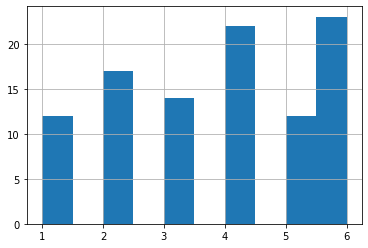

In [154]:
df_roll_sorted= df_roll.sort_values(by= 'Number')
df_roll_sorted['Number'].hist()

In [155]:
"""
your comments here
"""

# Me llama la atención la frequencia del valor 5 que es bastante inferior al de el resto de valores

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [156]:
# your code here

media(df_roll['Number'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [157]:
# your code here

df_roll_frequency= df_roll_sorted['Number'].value_counts().reset_index()
df_roll_frequency.columns= ['Number', 'Frequency']
df_roll_frequency.sort_values(by= 'Number')
df_roll_frequency

,Number,Frequency
0,6,23
1,4,22
2,2,17
3,3,14
4,1,12
5,5,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

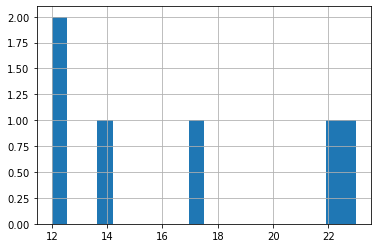

In [160]:
# your code here
df_roll_frequency['Frequency'].hist(bins=20)

<AxesSubplot:xlabel='Number'>

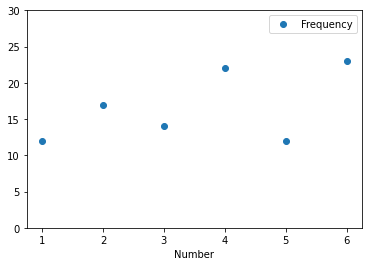

In [185]:
df_roll_frequency.plot(x='Number', y='Frequency', style= 'o', ylim=(0,30))

In [ ]:
"""
your comments here
"""

#Diría que la freuqencia de los valores 4 y 6 es mas alta que el resto

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [184]:
# your code here

df_roll_thousand= pd.read_csv('./../data/roll_the_dice_thousand.csv')
df_roll_thousand.columns= ['Unnamed', 'Roll', 'Number']
df_roll_thousand_sorted= df_roll_thousand.sort_values(by= 'Number')
df_roll_thousand_frequency= df_roll_thousand_sorted['Number'].value_counts().reset_index()
df_roll_thousand_frequency.columns= ['Number', 'Frequency']
df_roll_thousand_frequency.sort_values(by= 'Number')
df_roll_thousand_frequency

,Number,Frequency
0,1,175
1,3,175
2,4,168
3,2,167
4,6,166
5,5,149


<AxesSubplot:xlabel='Number'>

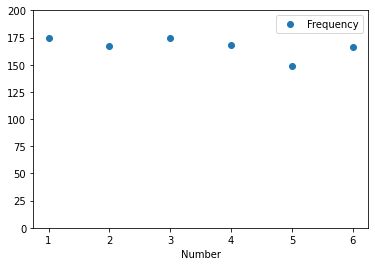

In [186]:
df_roll_thousand_frequency.plot(x='Number', y='Frequency', style= 'o', ylim=(0,200))

In [ ]:
"""
your comments here
"""
#Aquí sí que se observa que la distribución de valores es equitativa

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [211]:
# your code here

df_ages= pd.read_csv('./../data/ages_population.csv')
#len(df_ages)
df_ages_sorted= df_ages.sort_values(by='observation')
#df_ages_sorted.describe()

df_ages_frequency= df_ages_sorted['observation'].value_counts().reset_index()
df_ages_frequency.columns= ['Number', 'Age']
df_ages_frequency.head()
df_ages_frequency.sort_values(by= 'Age')


,Number,Age
71,82.0,1
65,7.0,1
66,4.0,1
70,73.0,1
68,70.0,1
...,...,...
4,43.0,32
3,35.0,33
2,30.0,34
1,41.0,36


<AxesSubplot:xlabel='Number'>

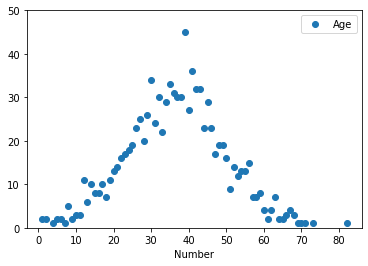

In [213]:
df_ages_frequency.plot(x='Number', y='Age', style= 'o', ylim=(0,50))

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [192]:
# your code here
mean= df_ages['observation'].mean()
st= df_ages['observation'].std()
print ('Mean', mean,'Std', st)

Mean 36.56 Std 12.816499625976762


In [ ]:
"""
your comments here
"""

#Sí, en la gráfica veo que la media está cerca del 40 
#y el 95% de valores si parece está entre el rango de dos veces la desviación (hacia la izq y la drcha)

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [222]:
# your code here
df_ages_2= pd.read_csv('./../data/ages_population2.csv')
#len(df_ages_2)
df_ages_2_sorted= df_ages_2.sort_values(by='observation')

df_ages_2_frequency= df_ages_2_sorted['observation'].value_counts().reset_index()
df_ages_2_frequency.columns= ['Number', 'Age']
df_ages_2_frequency.head()
df_ages_2_frequency.sort_values(by= 'Age')

,Number,Age
17,36.0,2
15,35.0,3
16,19.0,3
14,34.0,7
13,20.0,13
12,21.0,17
11,33.0,22
10,32.0,31
9,22.0,35
8,23.0,41


<AxesSubplot:xlabel='Number'>

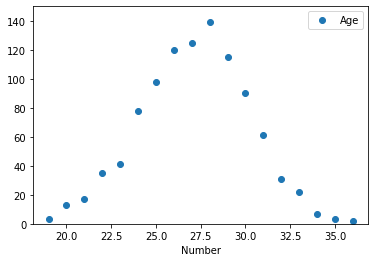

In [224]:
df_ages_2_frequency.plot(x='Number', y='Age', style= 'o', ylim=(0,150))

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [225]:
mean= df_ages_2['observation'].mean()
st= df_ages_2['observation'].std()
print ('Mean', mean,'Std', st)

Mean 27.155 Std 2.969813932689186


In [226]:
"""
your comments here
"""

#La media se mueve más hacia el 27 desde el 36 que observábamos antes
#Se afina muchísimo tanto el valor de la media como su dispersión, que el rango pasa a ser de 12*2 a 2*2

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#La media se mueve más hacia el 27 desde el 36 que observábamos antes
#Se afina muchísimo tanto el valor de la media como su dispersión, que el rango pasa a ser de 12*2 a 2*2

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [235]:
# your code here
df_ages_3= pd.read_csv('./../data/ages_population3.csv')
#len(df_ages_3)
df_ages_3_sorted= df_ages_2.sort_values(by='observation')
df_ages_3_frequency= df_ages_3_sorted['observation'].value_counts().reset_index()
df_ages_3_frequency.columns= ['Number', 'Age']
df_ages_3_frequency.head()
df_ages_3_frequency.sort_values(by= 'Age')

,Number,Age
17,36.0,2
15,35.0,3
16,19.0,3
14,34.0,7
13,20.0,13
12,21.0,17
11,33.0,22
10,32.0,31
9,22.0,35
8,23.0,41


<AxesSubplot:xlabel='Number'>

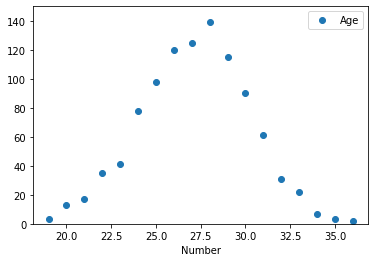

In [237]:
df_ages_3_frequency.plot(x='Number', y='Age', style= 'o', ylim=(0,150))

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [232]:
# your code here
mean3= df_ages_3['observation'].mean()
st3= df_ages_3['observation'].std()
print ('Mean3', mean3,'Std', st3)

Mean3 41.989 Std 16.144705959865934


In [ ]:
"""
your comments here
"""

#La media y desviación típica ha vuelto a crecer
#Entiendo que será porque la variabilidad de datos es mayor?

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [275]:
# your code here

q1=df_ages_3['observation'].quantile(0.25)
q2=df_ages_3['observation'].quantile(0.50)
q3=df_ages_3['observation'].quantile(0.75)

print ('Q1',q1,'Q2',q2,'Q3',q3)

Q1 30.0 Q2 40.0 Q3 53.0


In [ ]:
"""
your comments here
"""
#la media y la mediana se diferencian muy poco, 40 y 41 así que es una gráfica bastante simétrica
#los quartiles 1 y 3 están bastante cerca y por tanto corrobora que la distribución sea muy picuda

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [276]:
# your code here
q10=df_ages_3['observation'].quantile(0.1)
q20=df_ages_3['observation'].quantile(0.2)
q30=df_ages_3['observation'].quantile(0.3)
q40=df_ages_3['observation'].quantile(0.4)
q50=df_ages_3['observation'].quantile(0.5)
q60=df_ages_3['observation'].quantile(0.6)
q70=df_ages_3['observation'].quantile(0.7)
q80=df_ages_3['observation'].quantile(0.8)
q90=df_ages_3['observation'].quantile(0.9)
q100=df_ages_3['observation'].quantile(1)

print ('Q10',q10,'Q20',q20,'Q30',q30, 'Q40',q40,'Q50',q50,'Q60',q60, 'Q70',q70,'Q80',q80,'Q90',q90,'Q100',q100 )

Q10 22.0 Q20 28.0 Q30 32.0 Q40 36.0 Q50 40.0 Q60 45.0 Q70 50.0 Q80 57.0 Q90 67.0 Q100 77.0


In [ ]:
"""
your comments here
"""
# Al añadir quartiles veo que el valor min es 22 y el máximo 77 y confirmo en más detalle la distribución

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""